# Assingment 6

In [1]:
#imports to code further down
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load dataset from Internet
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(url, names=names)

In [3]:
# shows how many rows and colunms there are in the dataset
df.shape

(150, 5)

In [4]:
#shows the top of the dataset with the 
#headers and the first rows, you can speicfy how 
#many rows you want to se
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#shows the last rows in the the dataset
df.tail()

,sepal-length,sepal-width,petal-length,petal-width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
#shows the describtion of the dataset with the min. value and max. value
#it can also show the mean of the dataset
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Convert the dataset into two arrays
array = df.values
# Create two (sub)arrays from it
X = array[:,0:4] # data without class
y = array[:,4]   # just class

In [8]:
# Split the dataset into two: 
#   80% of it as training data
#   20% as a validation dataset
# Let Python split the set into four, we tell the proportion of splitting
test_set_size = 0.2

In [9]:
# Initial value for randomization
seed = 7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_set_size, random_state=seed)

In [10]:
#shows the data in y_test 
y_test

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

In [11]:
# RFC collects the data there have something in common and 
#displays them like in a tree with branches
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

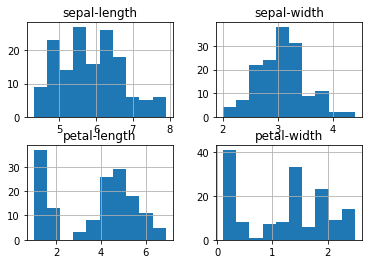

In [12]:
# Draw histograms
df.hist()
plt.show()

In [13]:
#shows the score of clf, and the closer to 1 the more accurate it is
clf.score(X_test, y_test)

0.8666666666666667

In [14]:
# Test on the test data, try prediction
prediction = clf.predict(X_test)
prediction

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

In [32]:
# m is a random value from the dataset and is being used to se if the 
#prediction os okay
m = [[5.7,1.0,5.6,2.6]]
my_prediction = clf.predict(m)
my_prediction

array(['Iris-virginica'], dtype=object)

In [34]:
# fist is the fist values from the dataset and is being used to se if the 
#prediction os okay
first = [[5.1, 3.5, 1.4, 0.2]]
my_prediction = clf.predict(first)
my_prediction

array(['Iris-setosa'], dtype=object)

In [16]:
# prints the score for the training and test data, before using PCA 
print("Train score before PCA",clf.score(X_train,y_train),"%")
print("Test score before PCA",clf.score(X_test,y_test),"%")

Train score before PCA 1.0 %
Test score before PCA 0.8666666666666667 %


In [17]:
# then use PCA to reduce the dimensionality with a variance ration of 95%
pca = PCA(.95)
X_new = pca.fit_transform(X)

In [20]:
# trains the model by using tree principal components
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)

In [21]:
# creates new test and train data
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state=20, stratify=y)

In [36]:
#fits the new pca data to RFC
clf_PCA = RandomForestClassifier(max_depth=2, random_state=0)
clf_PCA.fit(X_train_new,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [35]:
#prints the score for PCA data
print("Train score after PCA",clf_PCA.score(X_train_new,y_train),"%")
print("Test score after PCA",clf_PCA.score(X_test_new,y_test),"%")

Train score after PCA 0.31666666666666665 %
Test score after PCA 0.3333333333333333 %


In [ ]:
# creates new test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# normalized the data using SS 
# we do this beacuse the PCA works best with the normalized data

# Standardize features by removing 
#the mean and scaling to unit variance.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print("Train score before PCA",clf.score(X_train,y_train),"%")
print("Test score before PCA",clf.score(X_test,y_test),"%")

In [27]:
# fitting it with normalized data
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [29]:
# fitting it with one normalized component 
pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [30]:
#fits the new pca data to RFC
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [31]:
# there are two numbers that are diviant from the main diagonal 
# this is substantiated by the accuracy score 
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  1  5]]
Accuracy 0.9333333333333333
